In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow tensorflow_decision_forests

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Sale Report.csv to Amazon Sale Report.csv


In [ ]:
import io
amazon = pd.read_csv(io.BytesIO(uploaded['Amazon Sale Report.csv']))

#amazon = pd.read_csv('Amazon Sale Report.csv')

pd.set_option('display.max_columns', None)

amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
amazon.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
#address missing values

amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
amazon.isna().sum()

#lots of missing values. how to address each one?

#Courier Status: fill with "unknown" done
#currency: fill with "INR" (as result all values will be INR, so column can actually be removed) done
#Amount: fill with median done
#ship-city: fill with "unknown" done
#ship-state: fill with "unknown" done
#ship-postal-code: fill with "unknown" done. first convert to int
#ship-country: fill with "unknown" done
#promotion-ids: fill with "none" done
#fulfilled-by: fill with "other" done
#unnamed: 22: fill with "unknown" done

#address info has 33 for each category, can probably just remove those 33 rows or fill with unknown
#currency and amount have same number of NaN. fill with INR and 0?


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [ ]:
#metadata: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data?select=Amazon+Sale+Report.csv

#Category: Type of product. (String)
#Size: Size of the product. (String)
#Date: Date of the sale. (Date)
#Status: Status of the sale. (String)
#Fulfilment: Method of fulfilment. (String)
#Style: Style of the product. (String)
#SKU: Stock Keeping Unit. (String)
#ASIN: Amazon Standard Identification Number. (String)
#Courier Status: Status of the courier. (String)
#Qty: Quantity of the product. (Integer)
#Amount: Amount of the sale. (Float)
#B2B: Business to business sale. (Boolean)
#Currency: The currency used for the sale. (String)

In [ ]:
#currency: fill with "INR" (as result all values will be INR, so column can actually be removed)

amazon = amazon.drop(columns=['currency'])

#amazon.head()

In [ ]:
#Courier Status: fill with "unknown"
#ship-city: fill with "unknown"
#ship-state: fill with "unknown"
#ship-postal-code: fill with "unknown"
#ship-country: fill with "unknown"
#unnamed: 22: fill with "unknown"

amazon[['Courier Status', 'Unnamed: 22']] = amazon[['Courier Status', 'Unnamed: 22']].fillna('unknown')

#amazon.tail()

In [ ]:
#promotion-ids: fill with "none"

amazon[['promotion-ids']] = amazon[['promotion-ids']].fillna('none')

#amazon.tail()

In [ ]:
#fulfilled-by: fill with "other"

amazon[['fulfilled-by']] = amazon[['fulfilled-by']].fillna('other')

#amazon.tail()

In [ ]:
#Amount: fill with median

amazon['Amount'] = amazon['Amount'].fillna(amazon['Amount'].median(numeric_only=True))

#amazon.head(10)

In [ ]:
#confirm missing values have been addressed successfully (yes!)

amazon.isna().sum()

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code      33
ship-country          33
promotion-ids          0
B2B                    0
fulfilled-by           0
Unnamed: 22            0
dtype: int64

In [ ]:
amazon.shape

(128975, 23)

In [ ]:
amazon = amazon.dropna()

amazon.shape

#looks good. 33 rows gone

(128942, 23)

In [ ]:
#deciding to drop the unknown addresses actually. they are causing issues

amazon['ship-postal-code'] = amazon['ship-postal-code'].astype(int)

#amazon.head()



In [ ]:
#what do we want to predict?

#We want to know which factors lead to unsuccessful delivery as indicated by Status column

#create new boolean df column called "Unsuccessful" with a value of 1 being all unsuccessful values and a value of 0 being all successful values
#then run tensorflow decision forest to create predictive model on that column

In [ ]:
amazon["Unsuccessful"] = amazon['Status']

amazon

#duplicate column of Status created called Unsuccessful
#now need to replace all unsuccessful values with 1, rest with 0

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Unsuccessful
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081,IN,none,False,Easy Ship,unknown,Cancelled
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,unknown,Shipped - Delivered to Buyer
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,other,unknown,Shipped
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,none,False,Easy Ship,unknown,Cancelled
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,IN,none,False,other,unknown,Shipped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013,IN,none,False,other,False,Shipped
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,other,False,Shipped
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049,IN,none,False,other,False,Shipped
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,other,False,Shipped


In [ ]:
print(amazon['Status'].unique())

['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']


In [ ]:
#count the different values in Status column

cancelled = amazon['Status'].groupby(amazon['Status']).agg('count')

cancelled

Status
Cancelled                        18325
Pending                            658
Pending - Waiting for Pick Up      281
Shipped                          77788
Shipped - Damaged                    1
Shipped - Delivered to Buyer     28762
Shipped - Lost in Transit            5
Shipped - Out for Delivery          35
Shipped - Picked Up                973
Shipped - Rejected by Buyer         11
Shipped - Returned to Seller      1950
Shipped - Returning to Seller      145
Shipping                             8
Name: Status, dtype: int64

In [ ]:
#unsuccessful (1) outcomes: Cancelled, Shipped - Damaged, Shipped - Lost in Transit, Shipped - Rejected by Buyer, Shipped - Returned to Seller, Shipped - Returning to Seller
#successful (0) outcomes: Pending, Pending - Waiting for Pick Up, Shipped, Shipped - Delivered to Buyer, Shipped - Out for Delivery, Shipped - Picked Up, Shipping

#amazon['Unsuccessful'].replace(to_replace=["Cancelled", "Shipped - Damaged", "Shipped - Lost in Transit", "Shipped - Rejected by Buyer", "Returned to Seller", "Shipped - Returning to Seller"], value="1")
#amazon['Unsuccessful'].replace(to_replace=["Pending", "Pending - Waiting for Pick Up", "Shipped", "Shipped - Delivered to Buyer", "Shipped - Out for Delivery", "Shipped - Picked Up", "Shipping"], value="0")


amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Damaged",'1')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Lost in Transit",'1')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Rejected by Buyer",'1')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Returned to Seller",'1')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Returning to Seller",'1')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Pending - Waiting for Pick Up",'0')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Delivered to Buyer",'0')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Out for Delivery",'0')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped - Picked Up",'0')

amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipping",'0')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Shipped",'0')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Pending",'0')
amazon['Unsuccessful'] = amazon['Unsuccessful'].str.replace("Cancelled",'1')

amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Unsuccessful
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081,IN,none,False,Easy Ship,unknown,1
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,unknown,0
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,other,unknown,0
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,none,False,Easy Ship,unknown,1
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,IN,none,False,other,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013,IN,none,False,other,False,0
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,other,False,0
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049,IN,none,False,other,False,0
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,other,False,0


In [ ]:
#confirm that replacing values worked - Yes!

print(amazon['Unsuccessful'].unique())

['1' '0']


In [ ]:
#make sure unsuccessful column is numeric so that model can run

#amazon.dtypes

#it is object, so must convert

In [ ]:
amazon['Unsuccessful'] = amazon['Unsuccessful'].astype(int)

#amazon.dtypes

#success! time to run tensorflow

In [ ]:
#Unsupported object type bool

#will need to convert B2B data type from bool to object

#amazon['B2B'] = amazon['B2B'].astype(object)

#amazon.dtypes

In [ ]:
print(amazon['B2B'].unique())

[False  True]


In [ ]:
print(amazon['Unnamed: 22'].unique())

['unknown' False]


In [ ]:
#unnamed 22 column may be causing issues, will try to run conversion to object or simply remove column
#may have to change False values to "no"

amazon['Unnamed: 22'] = amazon['Unnamed: 22'].astype(object)
amazon['Unnamed: 22'] = amazon['Unnamed: 22'].str.replace("False",'no')

#amazon.dtypes

In [ ]:
#amazon = amazon.drop(columns=['Unnamed: 22'])

amazon.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B',
       'fulfilled-by', 'Unnamed: 22', 'Unsuccessful'],
      dtype='object')

In [ ]:
#now postal code is an issue. It has a decimal, should probably have that removed

#amazon['ship-postal-code'] = amazon['ship-postal-code'].astype(int)

amazon.dtypes

#the 33 unknown addresses are simply causing problems, will drop them



index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
ship-postal-code        int64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
Unsuccessful            int64
dtype: object

In [ ]:
#convert postal code back to object

amazon['ship-postal-code'] = amazon['ship-postal-code'].astype(object)

In [ ]:
amazon['B2B'] = amazon['B2B'].replace({True: 'True', False: 'False'})

In [ ]:
amazon['B2B'] = amazon['B2B'].str.replace("False",'no')
amazon['B2B'] = amazon['B2B'].str.replace("True",'yes')

print(amazon['B2B'].unique())

['no' 'yes']


In [ ]:
amazon = amazon.drop(columns=['Status', 'Courier Status', 'index'])

In [ ]:
#amazon = amazon.drop(columns=['index'])

In [ ]:
#convert date column to date?

#amazon["Date"] = pd.to_datetime(amazon["Date"])

#amazon.dtypes

In [ ]:
amazon.to_csv('amazon.csv', index=False)

In [ ]:
#split data into test/train data

mask = np.random.rand(len(amazon)) < 0.85
df_train = amazon[mask]
df_test = amazon[~mask]

In [ ]:
# Convert the dataset into a TensorFlow dataset.

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label="Unsuccessful")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label="Unsuccessful")

In [ ]:
#Train a Random Forest model.

#still doesn't like B2B columns. will change t/f values to something else so it runs. just like unnamed 22 columns

model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmp1ttnwxny as temporary training directory
Reading training dataset...
Training dataset read in 0:00:08.007972. Found 109493 examples.
Training model...
Model trained in 1:46:10.699883
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
#Summary of the model

model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (20):
	ASIN
	Amount
	B2B
	Category
	Date
	Fulfilment
	Order_ID
	Qty
	SKU
	Sales_Channel_
	Size
	Style
	Unnamed:_22
	fulfilled-by
	promotion-ids
	ship-city
	ship-country
	ship-postal-code
	ship-service-level
	ship-state

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.      "promotion-ids"  0.279628 ################
    2.                "Qty"  0.220037 ###########
    3.               "Date"  0.177591 ########
    4.         "ship-state"  0.153108 ######
    5.             "Amount"  0.133338 ####
    6.          "ship-city"  0.106743 ##
    7.              "Style"  0.098869 ##
    8.

In [ ]:
#Evaluate the model

model.evaluate(test_ds)

20/20 [==============================] - 4s 173ms/step - loss: 0.0000e+00 - accuracy: 0.9407


[0.0, 0.9406653046607971]

In [ ]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

20/20 [==============================] - 3s 161ms/step - loss: 0.0000e+00 - accuracy: 0.9407

loss: 0.0000
accuracy: 0.9407


In [ ]:
model.make_inspector().evaluation()

Evaluation(num_examples=109493, accuracy=0.9413204497091138, loss=0.20060470351464776, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

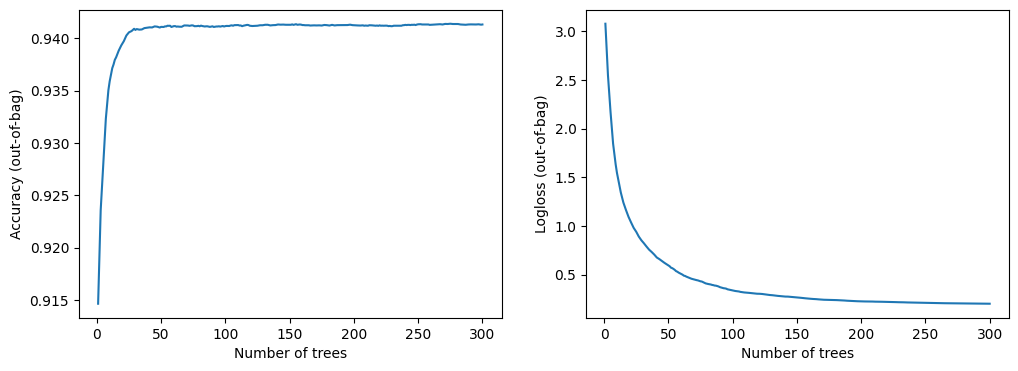

In [ ]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
#status and courier status are too closely tied to whether an order is successfully delivered to customer without issues
#should remove these columns from the model to get better idea of what actually predicts success instead just showing that status is identical to success

#94% accuracy

#top 3 predictors of failed shipments according to tfdf:
#   1.                "Qty" 5397022.182583 ################
#   2.      "promotion-ids" 2152297.776686 ######
#   3.               "Date" 1322486.547382 ###
#style

In [ ]:
#further analysis

#qty

qty = amazon['Qty'].groupby(amazon['Qty']).agg('count')

qty

#after visualizing with MicroStrategy, I realized that all cancelled orders had qty change to 0, thus making Qty a bad metric to use for prediction since
#change to 0 is retroactive (reactionary), not predictive

Qty
0      12802
1     115752
2        341
3         32
4          9
5          2
8          1
9          1
13         1
15         1
Name: Qty, dtype: int64

In [ ]:
promotion = amazon['promotion-ids'].groupby(amazon['promotion-ids']).agg('count')

promotion

promotion-ids
Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811                                                                                                                                                                                                                                                                                                                                        7
Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-EWAPBB6BDRGM6,Amazon PLCC Free-Financing Universal Merchant AAT-5WLEJFJPU23IC,Amazon PLCC Free-Financing Universal Merchant AAT-UFMRPWCRGE2ZM,Amazon PLCC Free-Financing Universal Merchant AAT-SF4YGC5K3O574,Amazon PLC

In [ ]:
style = amazon['Style'].groupby(amazon['Style']).agg('count')

style

Style
AN201      5
AN202      7
AN203      1
AN204     10
AN205      7
          ..
SET445     1
SET446     1
SET449     2
SET461     4
SET462     1
Name: Style, Length: 1377, dtype: int64

In [ ]:
category = amazon['Category'].groupby(amazon['Category']).agg('count')

category

NameError: ignored